In [ ]:
pip install pycaret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 18.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 64.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB

In [ ]:
from pycaret.classification import *


In [ ]:
import pandas as pd

# Load your dataset
data_path = '/content/drive/MyDrive/training_data.csv'
data = pd.read_csv(data_path)

# Remove rows where 'label' is missing
clean_data = data.dropna(subset=['label'])

# Check the remaining data
print(clean_data.isnull().sum(), "\n\nFirst few rows:\n", clean_data.head())


text     57
label     0
dtype: int64 

First few rows:
                                                 text  label
0      @levantin47415 ROFL. In your dreams Daeshbag.    1.0
1  jess mallexkion yes understand conclusive evid...    0.0
2  RT @SxFlint93: I'm not sexist but women should...    1.0
3  what?? racism? in failing to pronounce your na...    1.0
4  omg omg omg! finally the shoes r coming out ya...    1.0


In [ ]:
from pycaret.classification import setup, compare_models

# Setup the environment
clf1 = setup(clean_data, target='label', session_id=123,fold=2)

# Compare models to find the best one
best_model = compare_models()


,Description,Value
0,Session id,123
1,Target,label
2,Target type,Binary
3,Original data shape,"(120000, 2)"
4,Transformed data shape,"(120000, 2)"
5,Transformed train set shape,"(84000, 2)"
6,Transformed test set shape,"(36000, 2)"
7,Categorical features,1
8,Rows with missing values,0.0%
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.6246,0.6376,0.2556,0.9755,0.4051,0.2492,0.3693,5.0000
dt,Decision Tree Classifier,0.6246,0.6376,0.2556,0.9755,0.4051,0.2492,0.3693,0.9650
svm,SVM - Linear Kernel,0.6246,0.6376,0.2556,0.9755,0.4051,0.2492,0.3693,1.1200
ridge,Ridge Classifier,0.6246,0.6376,0.2556,0.9755,0.4051,0.2492,0.3693,0.9050
rf,Random Forest Classifier,0.6246,0.6376,0.2556,0.9755,0.4051,0.2492,0.3693,1.3500
lda,Linear Discriminant Analysis,0.6246,0.6376,0.2556,0.9755,0.4051,0.2492,0.3693,0.9750
et,Extra Trees Classifier,0.6246,0.6376,0.2556,0.9755,0.4051,0.2492,0.3693,2.4100
nb,Naive Bayes,0.5724,0.6375,0.6274,0.7433,0.5419,0.1449,0.2475,0.6900
qda,Quadratic Discriminant Analysis,0.5724,0.6376,0.6274,0.7433,0.5419,0.1449,0.2475,0.5950
xgboost,Extreme Gradient Boosting,0.5724,0.6376,0.6274,0.7433,0.5419,0.1449,0.2475,0.9350


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
rf = create_model('rf', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5275,0.7014,0.9920,0.5143,0.6774,0.0550,0.1487
1,0.6852,0.7010,0.3790,0.9776,0.5463,0.3704,0.4684
2,0.5285,0.7021,0.9937,0.5147,0.6782,0.0569,0.1553
3,0.6788,0.6948,0.3665,0.9759,0.5329,0.3575,0.4577
4,0.6773,0.6950,0.3652,0.9715,0.5309,0.3545,0.4537
Mean,0.6194,0.6989,0.6193,0.7908,0.5931,0.2389,0.3368
Std,0.0747,0.0033,0.3050,0.2256,0.0693,0.1494,0.1510


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
lr = create_model('lr', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6857,0.7014,0.3802,0.9774,0.5475,0.3714,0.4692
1,0.6852,0.7007,0.3790,0.9776,0.5463,0.3704,0.4684
2,0.6855,0.7024,0.3793,0.9788,0.5467,0.3711,0.4694
3,0.6788,0.6949,0.3665,0.9759,0.5329,0.3575,0.4577
4,0.6773,0.6953,0.3652,0.9715,0.5309,0.3545,0.4537
Mean,0.6825,0.6989,0.3741,0.9762,0.5409,0.3650,0.4637
Std,0.0037,0.0032,0.0067,0.0025,0.0073,0.0074,0.0066


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
svm = create_model('svm', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6857,0.7014,0.3802,0.9774,0.5475,0.3714,0.4692
1,0.6852,0.7007,0.3790,0.9776,0.5463,0.3704,0.4684
2,0.6855,0.7024,0.3793,0.9788,0.5467,0.3711,0.4694
3,0.6788,0.6949,0.3665,0.9759,0.5329,0.3575,0.4577
4,0.6773,0.6953,0.3652,0.9715,0.5309,0.3545,0.4537
Mean,0.6825,0.6989,0.3741,0.9762,0.5409,0.3650,0.4637
Std,0.0037,0.0032,0.0067,0.0025,0.0073,0.0074,0.0066


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
from pycaret.classification import pull

# Pull and print the performance metrics of all models compared
results = pull()
print(results)


                                    Model  Accuracy     AUC  Recall   Prec.  \
lr                    Logistic Regression    0.6246  0.6376  0.2556  0.9755   
dt               Decision Tree Classifier    0.6246  0.6376  0.2556  0.9755   
svm                   SVM - Linear Kernel    0.6246  0.6376  0.2556  0.9755   
ridge                    Ridge Classifier    0.6246  0.6376  0.2556  0.9755   
rf               Random Forest Classifier    0.6246  0.6376  0.2556  0.9755   
lda          Linear Discriminant Analysis    0.6246  0.6376  0.2556  0.9755   
et                 Extra Trees Classifier    0.6246  0.6376  0.2556  0.9755   
nb                            Naive Bayes    0.5724  0.6375  0.6274  0.7433   
qda       Quadratic Discriminant Analysis    0.5724  0.6376  0.6274  0.7433   
xgboost         Extreme Gradient Boosting    0.5724  0.6376  0.6274  0.7433   
knn                K Neighbors Classifier    0.5703  0.6375  0.6226  0.7428   
ada                  Ada Boost Classifier    0.5182 

In [ ]:
best_model = compare_models(sort='Accuracy')  # This will sort models based on accuracy


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.6246,0.6376,0.2556,0.9755,0.4051,0.2492,0.3693,1.0350
dt,Decision Tree Classifier,0.6246,0.6376,0.2556,0.9755,0.4051,0.2492,0.3693,0.5600
svm,SVM - Linear Kernel,0.6246,0.6376,0.2556,0.9755,0.4051,0.2492,0.3693,0.8700
ridge,Ridge Classifier,0.6246,0.6376,0.2556,0.9755,0.4051,0.2492,0.3693,0.9600
rf,Random Forest Classifier,0.6246,0.6376,0.2556,0.9755,0.4051,0.2492,0.3693,1.8800
lda,Linear Discriminant Analysis,0.6246,0.6376,0.2556,0.9755,0.4051,0.2492,0.3693,0.5850
et,Extra Trees Classifier,0.6246,0.6376,0.2556,0.9755,0.4051,0.2492,0.3693,2.1500
nb,Naive Bayes,0.5724,0.6375,0.6274,0.7433,0.5419,0.1449,0.2475,0.5800
qda,Quadratic Discriminant Analysis,0.5724,0.6376,0.6274,0.7433,0.5419,0.1449,0.2475,0.5550
xgboost,Extreme Gradient Boosting,0.5724,0.6376,0.6274,0.7433,0.5419,0.1449,0.2475,1.2150


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
# Get a summary of all models compared including their metrics
results = pull()

# Find the best model's accuracy
best_accuracy = results['Accuracy'].max()
best_model_name = results.loc[results['Accuracy'] == best_accuracy].index[0]

print(f"Best Model: {best_model_name}")
print(f"Best Accuracy: {best_accuracy}")



Best Model: lr
Best Accuracy: 0.6246


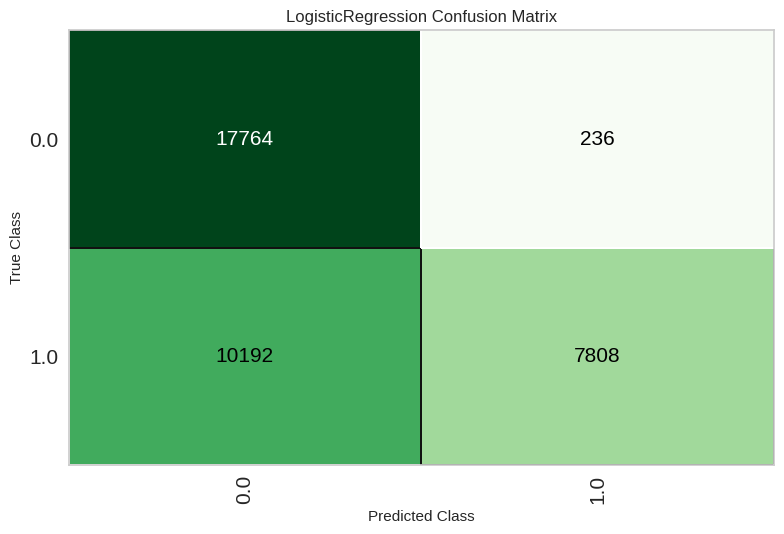

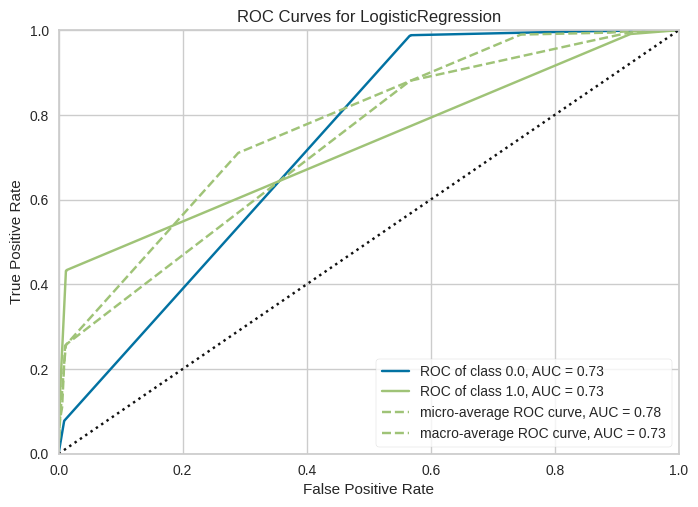

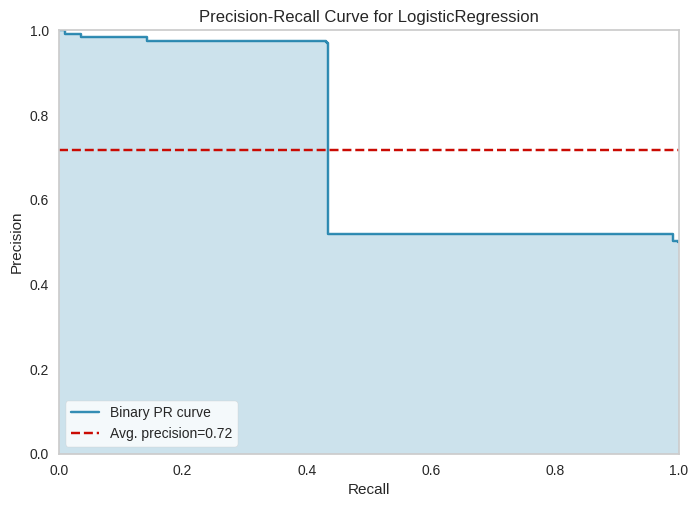

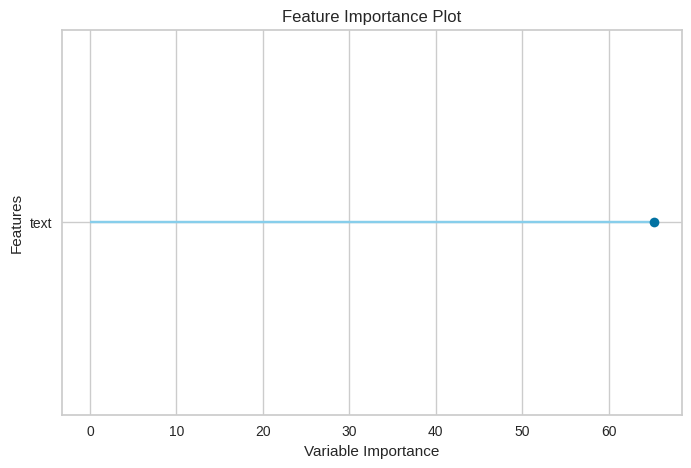

In [ ]:
from pycaret.classification import plot_model

# Plot the Confusion Matrix
plot_model(best_model, plot='confusion_matrix')

# Plot the ROC Curve
plot_model(best_model, plot='auc')

# Plot the Precision-Recall Curve
plot_model(best_model, plot='pr')

# Plot Feature Importance (if applicable)
plot_model(best_model, plot='feature')


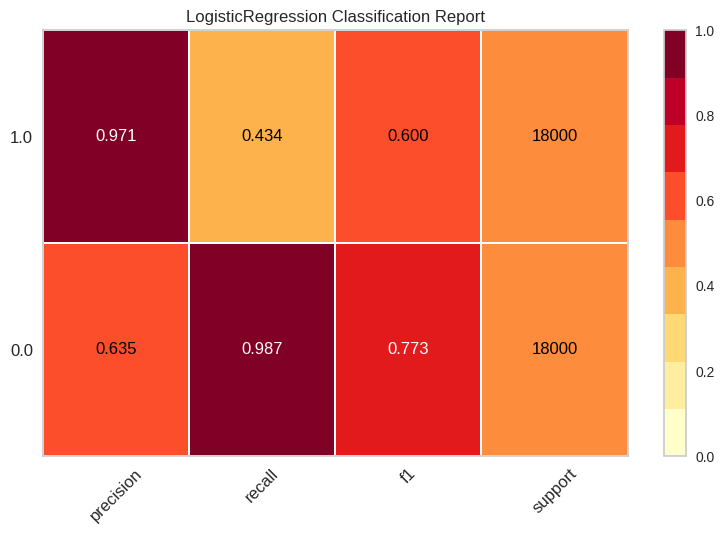

In [ ]:
plot_model(best_model, plot = 'class_report')

In [ ]:
from pycaret.classification import evaluate_model

# Open an interactive evaluation dashboard
evaluate_model(best_model)


In [ ]:
save_model(best_model, model_name='best-model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None, include=['text'],
                                     transformer=SimpleImputer(add_ind...
                                                               handle_unknown='value',
                                                               hierarchy=None,
              

In [ ]:
loaded_bestmodel = load_model('best-model')
print(loaded_bestmodel)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                ('categorical_imputer',
                 TransformerWrapper(exclude=None, include=['text'],
                                    transformer=SimpleImpu...
                                                              handle_unknown='value',
                                                    

In [ ]:
from sklearn import set_config
set_config(display='diagram')
loaded_bestmodel[0]

TransformerWrapper(exclude=None, include=[],
                   transformer=SimpleImputer(add_indicator=False, copy=True,
                                             fill_value=None,
                                             keep_empty_features=False,
                                             missing_values=nan,
                                             strategy='mean'))

In [ ]:
from pycaret.classification import evaluate_model

# Open an interactive evaluation dashboard
evaluate_model(best_model)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
pip install pycaret[analysis]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.8/287.8 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.5/177.5 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 58.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 62.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
pip install shap

In [ ]:
from pycaret.classification import predict_model

# Assuming 'new_data' is a DataFrame similar to the training data but without the target column
# predictions = predict_model(best_model, data=new_data)
# print(predictions.head())


In [ ]:
# Assume you have loaded your full dataset as 'data'
# Let's create a new sample dataset by dropping the target column and using the first few rows for simplicity

sample_data = data.drop(columns=['label']).head()  # Modify as needed if you have specific new data


In [ ]:
from pycaret.classification import predict_model

# Predict using the best model
predictions = predict_model(best_model, data=sample_data)
print(predictions)


                                                text  prediction_label  \
0  disgusting ignorant decisions friends schutzst...                 1   
1  ban vandal http wikipedia org wiki user damiru...                 1   
2  simpler potential explanation msm clue hell an...                 1   
3  I think it sits stronger with me as a black wo...                 1   
4  nonsense phrase way could ever duke earl would...                 0   

   prediction_score  
0            0.9729  
1            0.9864  
2            0.9729  
3            0.9864  
4            0.5417  


In [ ]:
# Display the type of the model
print(type(best_model))


<class 'sklearn.linear_model._logistic.LogisticRegression'>


In [ ]:
from pycaret.classification import save_model

# Save the model to disk
save_model(best_model, '/content/drive/MyDrive/balanced_train_DataSet.csv')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None, include=['text'],
                                     transformer=SimpleImputer(add_ind...
                                                               handle_unknown='value',
                                                               hierarchy=None,
              

In [ ]:
save_model(best_model, 'final_best_model')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None, include=['text'],
                                     transformer=SimpleImputer(add_ind...
                                                               handle_unknown='value',
                                                               hierarchy=None,
              

In [ ]:
import os

# Verify the model file exists
print("Model saved:", os.path.exists('final_best_model.pkl'))


Model saved: True
